<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/Node_Classification_with_Graph_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

In [ ]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [ ]:
citations

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


In [ ]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ['subject']

papers = pd.read_csv(os.path.join(data_dir, 'cora.content'), sep='\t', header=None, names = column_names)

print('pepers shape:' , papers.shape)

pepers shape: (2708, 1435)


In [ ]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,term_9,term_10,term_11,term_12,term_13,term_14,term_15,term_16,term_17,term_18,term_19,term_20,term_21,term_22,term_23,term_24,term_25,term_26,term_27,term_28,term_29,term_30,term_31,term_32,term_33,term_34,term_35,term_36,term_37,term_38,...,term_1394,term_1395,term_1396,term_1397,term_1398,term_1399,term_1400,term_1401,term_1402,term_1403,term_1404,term_1405,term_1406,term_1407,term_1408,term_1409,term_1410,term_1411,term_1412,term_1413,term_1414,term_1415,term_1416,term_1417,term_1418,term_1419,term_1420,term_1421,term_1422,term_1423,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Case_Based


In [ ]:
print(papers.sample(5).T)

                       238  ...                     277
paper_id            119761  ...                  976334
term_0                   0  ...                       0
term_1                   0  ...                       0
term_2                   0  ...                       0
term_3                   0  ...                       0
...                    ...  ...                     ...
term_1429                0  ...                       0
term_1430                0  ...                       0
term_1431                0  ...                       0
term_1432                0  ...                       0
subject    Neural_Networks  ...  Reinforcement_Learning

[1435 rows x 5 columns]


In [ ]:
print(papers.subject.value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


In [ ]:
class_values = sorted(papers['subject'].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers['paper_id'].unique()))}


In [ ]:
paper_idx[116081]

944

In [ ]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,term_9,term_10,term_11,term_12,term_13,term_14,term_15,term_16,term_17,term_18,term_19,term_20,term_21,term_22,term_23,term_24,term_25,term_26,term_27,term_28,term_29,term_30,term_31,term_32,term_33,term_34,term_35,term_36,term_37,term_38,...,term_1394,term_1395,term_1396,term_1397,term_1398,term_1399,term_1400,term_1401,term_1402,term_1403,term_1404,term_1405,term_1406,term_1407,term_1408,term_1409,term_1410,term_1411,term_1412,term_1413,term_1414,term_1415,term_1416,term_1417,term_1418,term_1419,term_1420,term_1421,term_1422,term_1423,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Case_Based


In [ ]:
papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

In [ ]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,term_9,term_10,term_11,term_12,term_13,term_14,term_15,term_16,term_17,term_18,term_19,term_20,term_21,term_22,term_23,term_24,term_25,term_26,term_27,term_28,term_29,term_30,term_31,term_32,term_33,term_34,term_35,term_36,term_37,term_38,...,term_1394,term_1395,term_1396,term_1397,term_1398,term_1399,term_1400,term_1401,term_1402,term_1403,term_1404,term_1405,term_1406,term_1407,term_1408,term_1409,term_1410,term_1411,term_1412,term_1413,term_1414,term_1415,term_1416,term_1417,term_1418,term_1419,term_1420,term_1421,term_1422,term_1423,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
1,1911,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5
2,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
3,248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2704,2371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2705,2372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2706,955,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


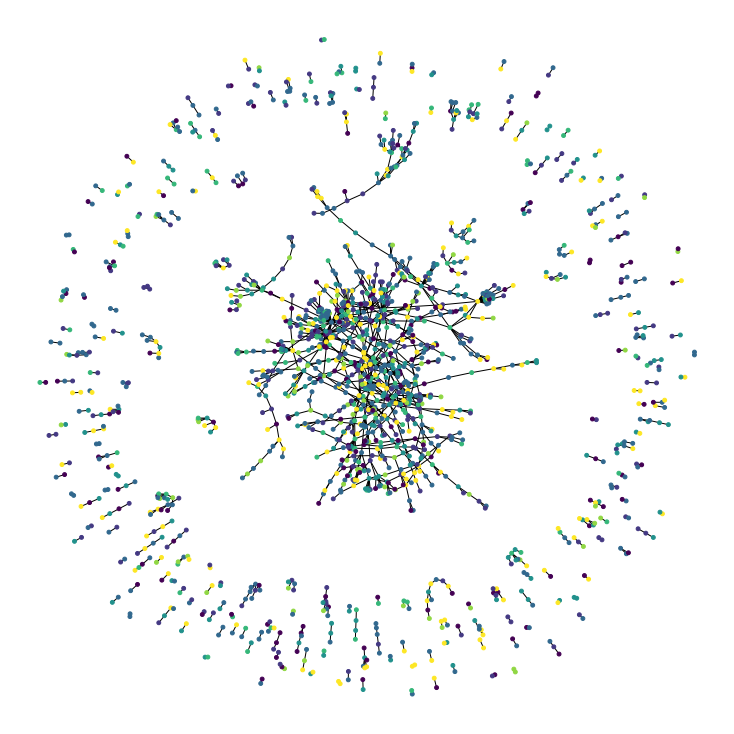

In [ ]:
plt.figure(figsize=(10,10))
colors = papers['subject'].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color = subjects)

In [ ]:
papers[papers["paper_id"].isin(list(cora_graph.nodes))]

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,term_9,term_10,term_11,term_12,term_13,term_14,term_15,term_16,term_17,term_18,term_19,term_20,term_21,term_22,term_23,term_24,term_25,term_26,term_27,term_28,term_29,term_30,term_31,term_32,term_33,term_34,term_35,term_36,term_37,term_38,...,term_1394,term_1395,term_1396,term_1397,term_1398,term_1399,term_1400,term_1401,term_1402,term_1403,term_1404,term_1405,term_1406,term_1407,term_1408,term_1409,term_1410,term_1411,term_1412,term_1413,term_1414,term_1415,term_1416,term_1417,term_1418,term_1419,term_1420,term_1421,term_1422,term_1423,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
3,248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
8,463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9,2003,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2700,2411,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2701,2443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2705,2372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
citations[citations.source == 1001]

,target,source
326,16,1001
335,18,1001


In [ ]:
a = []
for _, group_data in papers.groupby("subject"):
  random_selection = np.random.rand(len(group_data.index)) <= 0.5
  a.append(random_selection)
  if len(a) == 1:
    break

In [ ]:
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1321, 1435)
Test data shape: (1387, 1435)


In [ ]:
train_data

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,term_9,term_10,term_11,term_12,term_13,term_14,term_15,term_16,term_17,term_18,term_19,term_20,term_21,term_22,term_23,term_24,term_25,term_26,term_27,term_28,term_29,term_30,term_31,term_32,term_33,term_34,term_35,term_36,term_37,term_38,...,term_1394,term_1395,term_1396,term_1397,term_1398,term_1399,term_1400,term_1401,term_1402,term_1403,term_1404,term_1405,term_1406,term_1407,term_1408,term_1409,term_1410,term_1411,term_1412,term_1413,term_1414,term_1415,term_1416,term_1417,term_1418,term_1419,term_1420,term_1421,term_1422,term_1423,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
1044,2279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1643,135,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1614,1534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
47,1237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540,502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,185,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1641,1508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
384,1343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
851,2295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [ ]:
def run_experiment(model, x_train, y_train):
  # Compile the model.
  model.compile(optimizer = keras.optimizers.Adam(learning_rate),
                loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = [keras.metrics.SparseCategoricalAccuracy(name='acc')])
  
  # create early stopping callback 
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=50, restore_best_weights=True)

  #fit model 
  history = model.fit(x=x_train, y=y_train, epochs = num_epochs, batch_size = batch_size, validation_split = 0.5, callbacks=[early_stopping])


  return history
   

In [ ]:
def display_learning_curves(history):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.legend(['train', 'test'], loc='upper right')
  ax1.set_xlabel('epochs')
  ax1.set_ylabel('loss')

  ax2.plot(history.history["acc"])
  ax2.plot(history.history["val_acc"])
  ax2.legend(["train", "test"], loc="upper right")
  ax2.set_xlabel("Epochs")
  ax2.set_ylabel("Accuracy")
  plt.show()


In [ ]:
#Implement Feedforward Network (FFN) Module
#We will use this module in the baseline and the GNN models.

def create_ffn(hidden_units, dropout_rate, name = None):
  fnn_layers = []

  for units in hidden_units:
    fnn_layers.append(layers.BatchNormalization())
    fnn_layers.append(layers.Dropout(dropout_rate))
    fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

  return keras.Sequential(fnn_layers, name = name)
  

In [ ]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

In [ ]:
x_test.shape

(1387, 1433)

In [ ]:
y_test.shape

(1387,)

In [ ]:
class_idx

{'Case_Based': 0,
 'Genetic_Algorithms': 1,
 'Neural_Networks': 2,
 'Probabilistic_Methods': 3,
 'Reinforcement_Learning': 4,
 'Rule_Learning': 5,
 'Theory': 6}

In [ ]:
len(x_train)

1321

In [ ]:
def create_baseline_model(hidden_units, num_classes, dropout_rate = 0.2):
  inputs = layers.Input(shape = (num_features,), name = 'input_features')
  x = create_ffn(hidden_units, dropout_rate, name = f'ffn_block1')(inputs)
  for block_idx in range(4):
    #create an ffn block 
    x1 = create_ffn(hidden_units, dropout_rate, name=f'ffn_block{block_idx +2}')(x)
    #add skip connection
    x = layers.Add(name = f"skip_connection{block_idx +2}")([x, x1])
  
  #compute_logits
  logits = layers.Dense(num_classes, name = 'logits')(x)
  #create the model
  return keras.Model(inputs=inputs, outputs = logits, name = 'baseline')


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_features (InputLayer)     [(None, 1433)]       0                                            
__________________________________________________________________________________________________
ffn_block1 (Sequential)         (None, 32)           52804       input_features[0][0]             
__________________________________________________________________________________________________
ffn_block2 (Sequential)         (None, 32)           2368        ffn_block1[0][0]                 
__________________________________________________________________________________________________
skip_connection2 (Add)          (None, 32)           0           ffn_block1[0][0]                 
                                                                 ffn_block2[0][0]          

In [ ]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
3/3 [==============================] - 4s 258ms/step - loss: 4.5925 - acc: 0.1246 - val_loss: 1.8714 - val_acc: 0.3132
Epoch 2/300
3/3 [==============================] - 0s 52ms/step - loss: 3.0686 - acc: 0.1909 - val_loss: 1.8246 - val_acc: 0.3071
Epoch 3/300
3/3 [==============================] - 0s 48ms/step - loss: 2.6998 - acc: 0.2398 - val_loss: 1.8089 - val_acc: 0.3071
Epoch 4/300
3/3 [==============================] - 0s 46ms/step - loss: 2.4392 - acc: 0.2876 - val_loss: 1.8184 - val_acc: 0.3419
Epoch 5/300
3/3 [==============================] - 0s 53ms/step - loss: 2.0725 - acc: 0.3056 - val_loss: 1.8394 - val_acc: 0.4054
Epoch 6/300
3/3 [==============================] - 0s 47ms/step - loss: 1.9911 - acc: 0.2924 - val_loss: 1.8431 - val_acc: 0.4614
Epoch 7/300
3/3 [==============================] - 0s 49ms/step - loss: 1.9136 - acc: 0.3208 - val_loss: 1.8283 - val_acc: 0.4614
Epoch 8/300
3/3 [==============================] - 0s 51ms/step - loss: 1.8390 - acc: 0.3

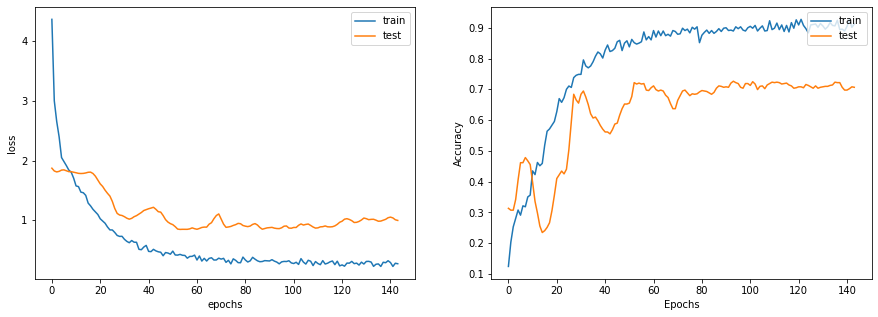

In [ ]:
display_learning_curves(history)

In [ ]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 67.99%


In [ ]:
def generate_random_instances(num_instances):
  token_probability = x_train.mean(axis=0)
  instances = []
  for _ in range(num_instances):
    probabilities = np.random.uniform(size= len(token_probability))
    instance = (probabilities <= token_probability).astype(int)
    instances.append(instance)

  return np.array(instances)


def display_class_probabilities(probabilities):
  for instance_idx, probs in enumerate(probabilities):
    print(f"Instance {instance_idx + 1}:")
    for class_idx, prob in enumerate(probs):
      print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")

In [ ]:
token_probability = x_train.mean(axis=0)
probabilities = np.random.uniform(size= len(token_probability))
instance = (probabilities <= token_probability).astype(int)
instance

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Instance 1:
- Case_Based: 0.74%
- Genetic_Algorithms: 4.75%
- Neural_Networks: 50.94%
- Probabilistic_Methods: 3.43%
- Reinforcement_Learning: 14.88%
- Rule_Learning: 0.62%
- Theory: 24.63%
Instance 2:
- Case_Based: 1.57%
- Genetic_Algorithms: 2.42%
- Neural_Networks: 90.48%
- Probabilistic_Methods: 1.14%
- Reinforcement_Learning: 0.43%
- Rule_Learning: 0.9%
- Theory: 3.05%
Instance 3:
- Case_Based: 1.79%
- Genetic_Algorithms: 3.36%
- Neural_Networks: 9.99%
- Probabilistic_Methods: 74.66%
- Reinforcement_Learning: 3.14%
- Rule_Learning: 0.31%
- Theory: 6.74%
Instance 4:
- Case_Based: 1.43%
- Genetic_Algorithms: 28.35%
- Neural_Networks: 26.47%
- Probabilistic_Methods: 32.14%
- Reinforcement_Learning: 1.13%
- Rule_Learning: 2.85%
- Theory: 7.64%
Instance 5:
- Case_Based: 3.4%
- Genetic_Algorithms: 5.14%
- Neural_Networks: 24.66%
- Probabilistic_Methods: 12.24%
- Reinforcement_Learning: 2.0%
- Rule_Learning: 6.82%
- Theory: 45.74%
Instance 6:
- Case_Based: 0.32%
- Genetic_Algorithms: 1.8

In [ ]:
# Build a Graph Neural Network Model

# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[['source', 'target']].to_numpy().T

In [ ]:
edges.shape

(2, 5429)

In [ ]:
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])


In [ ]:
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(papers.sort_values('paper_id')[feature_names].to_numpy(), dtype=tf.dtypes.float32)

In [ ]:
node_features

<tf.Tensor: shape=(2708, 1433), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

In [ ]:
print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 5429)
Nodes shape: (2708, 1433)


In [ ]:
# The technique implemented use ideas from Graph Convolutional Networks, GraphSage, Graph Isomorphism Network, Simple Graph Networks, and Gated Graph Sequence Neural Networks. 
#Two other key techniques that are not covered are Graph Attention Networks and Message Passing Neural Networks.

# Implement a graph convolution layer


In [ ]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [ ]:
wei = tf.expand_dims(edge_weights, -1)
wei

<tf.Tensor: shape=(5429, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
node_features

<tf.Tensor: shape=(2708, 1433), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
ffn = create_ffn(hidden_units, dropout_rate)


In [ ]:
mass = ffn(node_features)

In [ ]:
mass * wei

InvalidArgumentError: ignored

In [ ]:
edges[0]

In [ ]:
tf.gather(node_features, edges[1])

<tf.Tensor: shape=(5429, 1433), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.gather()

In [ ]:
edges[1]

array([   0,    0,    0, ..., 1874, 1876, 1897])

In [ ]:
node_features

<tf.Tensor: shape=(2708, 1433), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Implement a graph neural network node classifier

class GNNNodeClassifier(tf.keras.Model):
  def __init__(self, graph_info, num_classes, hidden_units, aggregation_type = 'sum', combination_type='concat', dropout_rate=0.2, normalize=True, *args, **kwargs):
    super(GNNNodeClassifier, self).__init__(*args, **kwargs)

    # Unpack graph_info to three elements: node_features, edges, and edge_weight.
    node_features, edges, edge_weights = graph_info
    self.node_features = node_features 
    self.edges = edges 
    self.edge_weights = edge_weights
    # Set edge_weights to ones if not provided.
    if self.edge_weights is None:
      self.edge_weights = tf.ones(shape = edges.shape[1])
    # Scale edge_weights to sum to 1.
    self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

    #create a process layer 
    self.preprocess = create_ffn(hidden_units, dropout_rate, name = 'preprocess')
    # create Graph conv layer 
    self.conv1 = GraphConvLayer(hidden_units, dropout_rate, aggregation_type, combination_type, normalize, name = 'graph_conv1')

    # Create the second GraphConv layer.
    self.conv2 = GraphConvLayer(
        hidden_units,
        dropout_rate,
        aggregation_type,
        combination_type,
        normalize,
        name="graph_conv2",
    )
    # Create a postprocess layer.
    self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
    # Create a compute logits layer.
    self.compute_logits = layers.Dense(units=num_classes, name="logits")


  def call(self, input_node_indices):
    # Preprocess the node_features to produce node representations.
    x = self.preprocess(self.node_features)
    # Apply the first graph conv layer.
    x1 = self.conv1((x, self.edges, self.edge_weights))
    # Skip connection.
    x = x1 + x
    # Apply the second graph conv layer.
    x2 = self.conv2((x, self.edges, self.edge_weights))
    # Skip connection.
    x = x2 + x
    # Postprocess node embedding.
    x = self.postprocess(x)
    # Fetch node embeddings for the input node_indices.
    node_embeddings = tf.squeeze(tf.gather(x, input_node_indices))
    # Compute logits
    return self.compute_logits(node_embeddings)

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.09787933 -0.18201944  0.10687558  0.14825277  0.07036535 -0.15633753
   0.06668316]
 [-0.03085726 -0.00347854 -0.02126107  0.03934212 -0.09348104  0.05411878
   0.00374332]
 [-0.00531756 -0.05020213  0.0902069   0.0045368   0.14353363 -0.19721304
  -0.05584282]], shape=(3, 7), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
preprocess (Sequential)      (2708, 32)                52804     
_________________________________________________________________
graph_conv1 (GraphConvLayer) multiple                  5888      
_________________________________________________________________
graph_conv2 (GraphConvLayer) multiple                  5888      
_________________________________________________________________
postprocess (Sequential)     (2708, 32)                2368      
____________________________________________________________

In [ ]:
x_train = train_data.paper_id.to_numpy()
x_train

array([2279,  135, 1534, ..., 1343, 2295,   50])

In [ ]:
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/300
3/3 [==============================] - 5s 470ms/step - loss: 2.5344 - acc: 0.1463 - val_loss: 1.9325 - val_acc: 0.1286
Epoch 2/300
3/3 [==============================] - 1s 211ms/step - loss: 2.1131 - acc: 0.1857 - val_loss: 1.9225 - val_acc: 0.1437
Epoch 3/300
3/3 [==============================] - 1s 213ms/step - loss: 2.0121 - acc: 0.1989 - val_loss: 1.9128 - val_acc: 0.1483
Epoch 4/300
3/3 [==============================] - 1s 204ms/step - loss: 1.9290 - acc: 0.2238 - val_loss: 1.9021 - val_acc: 0.1543
Epoch 5/300
3/3 [==============================] - 1s 212ms/step - loss: 1.9199 - acc: 0.2512 - val_loss: 1.8933 - val_acc: 0.1967
Epoch 6/300
3/3 [==============================] - 1s 220ms/step - loss: 1.8914 - acc: 0.2854 - val_loss: 1.8870 - val_acc: 0.2769
Epoch 7/300
3/3 [==============================] - 1s 205ms/step - loss: 1.8838 - acc: 0.2390 - val_loss: 1.8805 - val_acc: 0.3011
Epoch 8/300
3/3 [==============================] - 1s 215ms/step - loss: 1.8769 - a

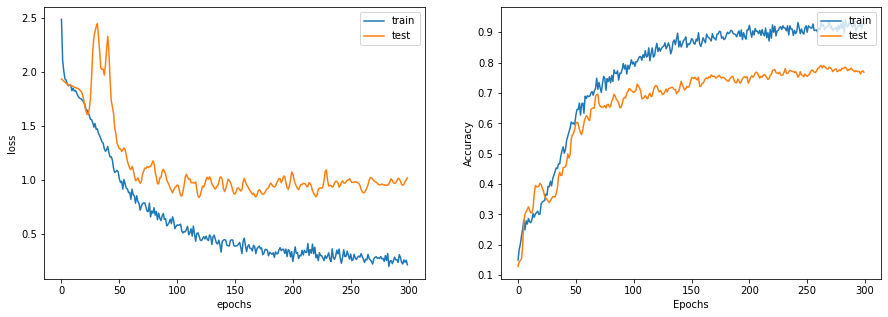

In [ ]:
display_learning_curves(history)


In [ ]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 75.41%


In [ ]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []

for subject_idx, group in papers.groupby("subject"):
    subject_papers = list(group.paper_id)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(papers.paper_id), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)

In [ ]:
new_citations.shape

(2, 49)

In [ ]:
new_edges.shape

(2, 5478)

In [ ]:
print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)

gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])

print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)


Original node_features shape: (2708, 1433)
Original edges shape: (2, 5429)
New node_features shape: (2715, 1433)
New edges shape: (2, 5478)
Instance 1:
- Case_Based: 48.74%
- Genetic_Algorithms: 0.62%
- Neural_Networks: 8.84%
- Probabilistic_Methods: 1.33%
- Reinforcement_Learning: 27.27%
- Rule_Learning: 0.13%
- Theory: 13.07%
Instance 2:
- Case_Based: 0.05%
- Genetic_Algorithms: 1.11%
- Neural_Networks: 98.64%
- Probabilistic_Methods: 0.08%
- Reinforcement_Learning: 0.1%
- Rule_Learning: 0.0%
- Theory: 0.02%
Instance 3:
- Case_Based: 0.06%
- Genetic_Algorithms: 0.08%
- Neural_Networks: 7.0%
- Probabilistic_Methods: 92.13%
- Reinforcement_Learning: 0.07%
- Rule_Learning: 0.01%
- Theory: 0.66%
Instance 4:
- Case_Based: 0.09%
- Genetic_Algorithms: 0.19%
- Neural_Networks: 1.12%
- Probabilistic_Methods: 98.18%
- Reinforcement_Learning: 0.08%
- Rule_Learning: 0.03%
- Theory: 0.31%
Instance 5:
- Case_Based: 1.9%
- Genetic_Algorithms: 37.43%
- Neural_Networks: 24.28%
- Probabilistic_Methods

In [ ]:
new_node_indices = [10, 20, 30, 40]

In [ ]:
logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Instance 1:
- Case_Based: 8.32%
- Genetic_Algorithms: 1.77%
- Neural_Networks: 28.74%
- Probabilistic_Methods: 13.96%
- Reinforcement_Learning: 19.81%
- Rule_Learning: 0.29%
- Theory: 27.12%
Instance 2:
- Case_Based: 0.07%
- Genetic_Algorithms: 99.27%
- Neural_Networks: 0.09%
- Probabilistic_Methods: 0.02%
- Reinforcement_Learning: 0.49%
- Rule_Learning: 0.04%
- Theory: 0.01%
Instance 3:
- Case_Based: 99.91%
- Genetic_Algorithms: 0.0%
- Neural_Networks: 0.0%
- Probabilistic_Methods: 0.06%
- Reinforcement_Learning: 0.02%
- Rule_Learning: 0.0%
- Theory: 0.0%
Instance 4:
- Case_Based: 99.87%
- Genetic_Algorithms: 0.0%
- Neural_Networks: 0.01%
- Probabilistic_Methods: 0.1%
- Reinforcement_Learning: 0.01%
- Rule_Learning: 0.01%
- Theory: 0.01%
